In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import kaggle
import zipfile
import os

def download_and_extract_kaggle_dataset(dataset: str, file_name: str, path: str = './', force: bool = False, quiet: bool = True, licenses= [], delete_after_download: bool = True):
   

    # Check if the CSV file already exists in the specified directory
    csv_exists = os.path.exists(os.path.join(path, file_name))
    
    if csv_exists and not force:
        print(f"The file {file_name} already exists. Skipping download.")
        return
    
    # Download the specific file as a ZIP
    kaggle.api.dataset_download_file(
        dataset,
        file_name,
        path,
        force,
        quiet,
        licenses
    )

    zip_file_name = path + file_name + '.zip'

    # Extract the contents of the ZIP file
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(path)
    
    if delete_after_download:  
        os.remove(zip_file_name)



In [3]:
# Execute the function
download_and_extract_kaggle_dataset('aiaiaidavid/the-big-dataset-of-ultra-marathon-running','TWO_CENTURIES_OF_UM_RACES.csv')

The file TWO_CENTURIES_OF_UM_RACES.csv already exists. Skipping download.


In [4]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_14532\107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [5]:
df.sample(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
6568570,2015,25.07.2015,La Herradura de Campoo (ESP),55km,127,7:59:18 h,*Reinosa,ESP,NaN,M,NaN,6.885,1460128
645660,2018,03.11.2018,Piros 85 terepfutó (TUK) (HUN),85km,329,13:50:39 h,NaN,HUN,1974.0,F,W40,6.14,192499
3450041,2022,30.07.2022,MEHT Monterosa Est Himalayan Trail - Epic (ITA),60km,98,14:00:17 h,Run Card,ITA,1982.0,M,M35,4.284,1010129
4324782,2006,29.10.2006,La Grande Course des Templiers (FRA),66km,1901,11:08:21 h,NaN,FRA,1970.0,M,M35,5.925,708361
6521299,2015,02.-03.05.2015,La 100 e Lode 100km (ITA),100km,93,11:23:56 h,La Fulminea,ITA,1977.0,M,M35,8.773,72435


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


## Data Preparation

In [7]:
# Removing club because it's useless
df.drop(['Athlete club'],axis=1,inplace=True)
# Removing age category, because it's redundant when we can get age column
df.drop(['Athlete age category'],axis=1, inplace=True)

In [8]:
pd.set_option('display.max_rows', None)
df['Year of event'].value_counts()

Year of event
2019    732207
2018    661483
2017    604638
2016    540073
2015    480722
2022    471598
2014    417613
2021    375604
2013    348829
2012    298981
2011    236397
2020    224203
2010    207315
2009    169969
2008    136333
2007    123766
2006    105639
2005     94253
2004     91813
2003     84114
2000     76563
2002     69190
2001     66071
1999     58672
1998     52782
1997     48538
1996     46962
1991     43954
1995     42503
1993     40793
1994     38906
1990     38775
1992     38603
1989     38491
1988     37351
1986     33014
1987     32301
1984     30692
1985     29417
1983     27542
1982     24847
1981     22577
1980     18948
1979     15790
1978     14562
1977     12781
1976      9791
1975      8498
1974      6447
1973      5938
1972      4693
1971      3984
1970      2674
1969      2213
1968      1756
1967      1359
1966      1109
1965       984
1964       830
1963       513
1962       434
1961       334
1960       270
1892       226
1959       196
1956       

In [9]:
# Rows with year of event < 1970 will be dropped, because there's very few of them
print(f"Before dropping {df[df['Year of event']<1970].shape}")
df = df.drop(df[df['Year of event'] < 1970].index)
print(f"After dropping {df[df['Year of event']<1970].shape}")

Before dropping (12995, 11)
After dropping (0, 11)


In [10]:
df['Event distance/length'].value_counts()

Event distance/length
50km                   1521926
100km                   946201
50mi                    351832
56km                    333250
87km                    210645
89km                    187987
24h                     182997
100mi                   173787
60km                    159494
45km                    157799
55km                    131047
6h                      125834
12h                     114317
80km                     97962
52km                     92611
65km                     90525
70km                     82684
53km                     71828
75km                     62811
48km                     61596
46km                     60038
90km                     57381
63km                     56926
51km                     52648
72km                     52367
54km                     51406
47km                     41177
58km                     39100
67km                     37387
57km                     37034
68km                     36551
73km             

In [11]:
# Filter rows where 'Event distance/length' is "50km", "100km", "56km", or "45km"
df = df[df['Event distance/length'].isin(["50km", "100km", "56km"])]


In [12]:
df['Event distance/length'].value_counts()

Event distance/length
50km     1521926
100km     946201
56km      333250
Name: count, dtype: int64

In [13]:
df.isnull().sum()

Year of event                     0
Event dates                       0
Event name                        0
Event distance/length             0
Event number of finishers         0
Athlete performance               1
Athlete country                   2
Athlete year of birth        234496
Athlete gender                    4
Athlete average speed             1
Athlete ID                        0
dtype: int64

In [14]:
# Percentage of missing values
(df.isnull().mean() * 100).round(2)

Year of event                0.00
Event dates                  0.00
Event name                   0.00
Event distance/length        0.00
Event number of finishers    0.00
Athlete performance          0.00
Athlete country              0.00
Athlete year of birth        8.37
Athlete gender               0.00
Athlete average speed        0.00
Athlete ID                   0.00
dtype: float64

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Use iterative imputer to predict missing values
imputer = IterativeImputer()
df['Athlete year of birth'] = imputer.fit_transform(df[['Athlete year of birth']])

In [16]:
df['Athlete year of birth'] = df['Athlete year of birth'].astype(int)

In [17]:
df['Athlete age'] = df['Year of event'] - df['Athlete year of birth']

In [18]:
df.dropna(subset=['Athlete performance','Athlete gender','Athlete average speed','Athlete country'],inplace=True)

In [19]:
# Function to extract month from date
def extract_month(date_str):
    parts = date_str.split('.')
    #print(f"Length: {len(parts)}")
    if len(parts) == 4:
        month_str = parts[2]
        month_str_clean = ''.join(filter(str.isdigit, month_str))
        return int(month_str_clean)
    if len(parts) == 3:
        month_str = parts[1]
        month_str_clean = ''.join(filter(str.isdigit, month_str))
        return int(month_str_clean)
    if len(parts) == 5:
        month_str = parts[3]
        month_str_clean = ''.join(filter(str.isdigit, month_str))
        return int(month_str_clean)
    else:
        return None


In [20]:
# Function validation
sample_dates = ["10.-11.10.2015", "02.07.2022", "28.03.-03.04.2016","31.12.2022-01.01.2023"]
for date in sample_dates:
    print(f"Date: {date} -> Month: {extract_month(date)}")

Date: 10.-11.10.2015 -> Month: 10
Date: 02.07.2022 -> Month: 7
Date: 28.03.-03.04.2016 -> Month: 4
Date: 31.12.2022-01.01.2023 -> Month: 1


In [21]:
df.isnull().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete year of birth        0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Athlete age                  0
dtype: int64

In [22]:
# Apply the function to extract months
df['Month of event'] = df['Event dates'].apply(extract_month).astype(int)

In [23]:
df = df[df['Athlete average speed'].str.contains(':') == False]

In [24]:
df['Athlete average speed'] = df['Athlete average speed'].astype(float)

In [25]:
# Removing all values bigger than 13, because that's the world record for average speed of marathorn runner
df = df[df['Athlete average speed'] <= 13]

In [26]:
mean_speed = df['Athlete average speed'].mean()
median_speed = df['Athlete average speed'].median()
std_deviation = df['Athlete average speed'].std()

# Calculate Z-scores
z_scores = df['Athlete average speed'].apply(lambda x: (x - mean_speed) / std_deviation)

# Identify outliers with absolute Z-score greater than 3 and extract 'Athlete average speed' values
outliers_speeds = df.loc[z_scores.abs() > 3, 'Athlete average speed']

In [27]:
# Remove outliers (rows with |Z| > 3)
df = df[z_scores.abs() <= 3]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1421331 entries, 0 to 6815743
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year of event              1421331 non-null  int64  
 1   Event dates                1421331 non-null  object 
 2   Event name                 1421331 non-null  object 
 3   Event distance/length      1421331 non-null  object 
 4   Event number of finishers  1421331 non-null  int64  
 5   Athlete performance        1421331 non-null  object 
 6   Athlete country            1421331 non-null  object 
 7   Athlete year of birth      1421331 non-null  int64  
 8   Athlete gender             1421331 non-null  object 
 9   Athlete average speed      1421331 non-null  float64
 10  Athlete ID                 1421331 non-null  int64  
 11  Athlete age                1421331 non-null  int64  
 12  Month of event             1421331 non-null  int64  
dtypes: float64(1), in

In [29]:
import re
# Extracting country code from the event name to new column and removing it from event name
df['Country Code'] = df['Event name'].apply(lambda x: re.findall(r'\((.*?)\)', str(x))[-1].split(';')[0])
df['Country Code'] = df['Country Code'].replace('', np.nan).dropna()
df['Event name'] = df['Event name'].apply(lambda x: re.sub(r'\((.*?)\)$', '', str(x)))


In [30]:
df.drop(df[df['Athlete age'] > 70].index, inplace=True)
df.drop(df[df['Athlete age'] < 18].index, inplace=True)
df=df.reset_index()

In [31]:
# Create new columns for 'Event distance (km)' and 'Event length (h)'
df[['Event distance (km)']] = df['Event distance/length'].apply(lambda x: [
    # Process distance
    (
        float(x.split(' ')[0].split('k')[0])  # If 'km' is present, extract the numeric value before 'km'
        if 'km' in x else np.nan
    ),
]).tolist()

In [32]:
# Function to convert time string to seconds
def time_to_seconds(time_str):
    parts = time_str.split(':')
    if len(parts) != 3:
        return np.nan  # Handle invalid format
    
    try:
        hours = int(parts[0].rstrip())
        minutes = int(parts[1])
        seconds = int(parts[2][0:2])  # Extract first two characters for seconds
        return (hours * 3600) + (minutes * 60) + seconds
    except ValueError:
        return np.nan  # Handle any conversion errors

# Apply the function to convert time strings and create new column
df['Athlete run time (s)'] = df['Athlete performance'].apply(time_to_seconds)



In [33]:
df=df[df['Athlete run time (s)']!=0]

In [34]:
df['Athlete run time (h)'] = round(df['Athlete run time (s)'] / 3600, 2)


In [35]:
df.drop(['Athlete run time (s)'],inplace=True,axis=1)

In [36]:
df=df[df['Athlete gender']!='X']

In [37]:
df=df.reset_index()

# Data Analysis

In [38]:
# Set global font sizes for axes labels, title, and tick labels
plt.rcParams['axes.labelsize'] = 12    # x and y axis labels
plt.rcParams['axes.titlesize'] = 14     # plot title


C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_14532\1728864619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


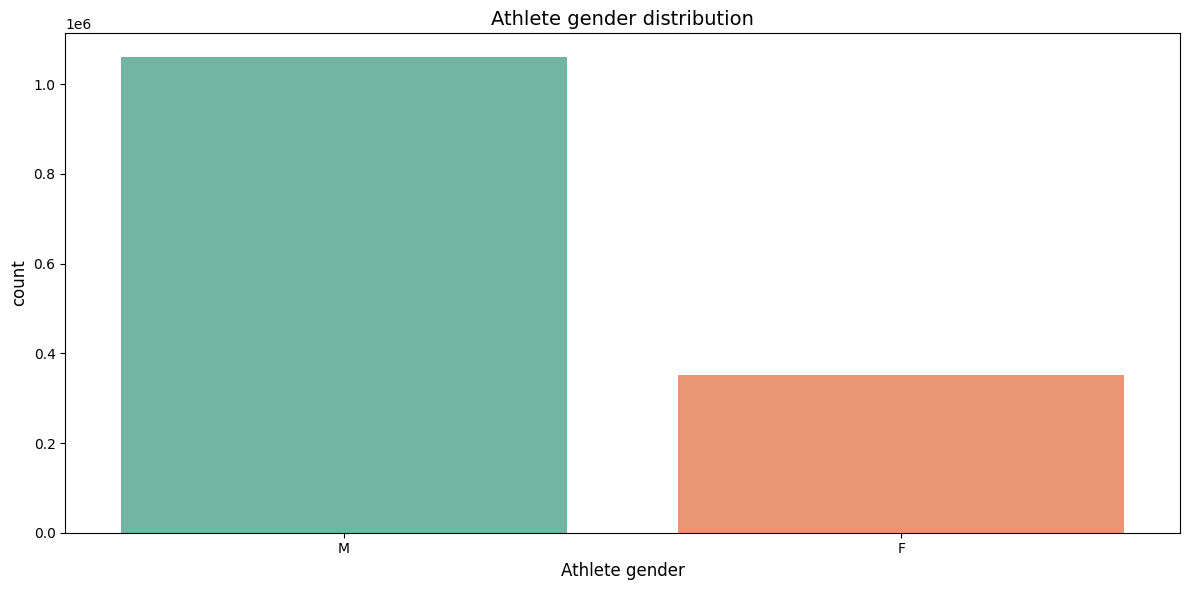

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='Athlete gender',
    palette='Set2'
)
plt.title('Athlete gender distribution')
plt.tight_layout()
plt.show()

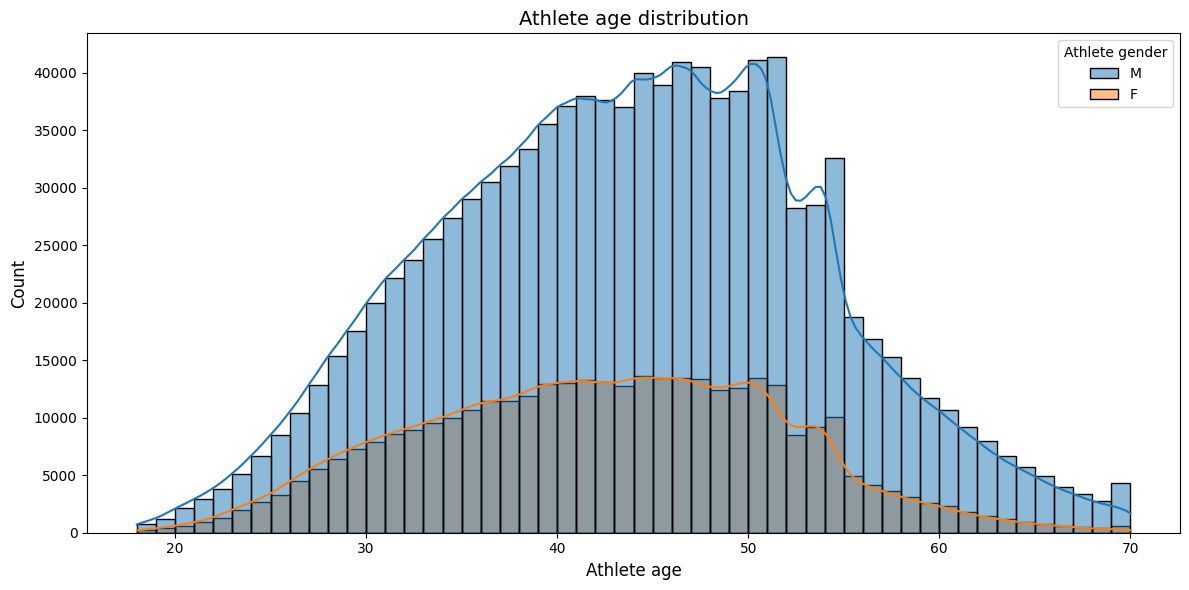

In [55]:
# Athlete age distribution
plt.figure(figsize=(12,6))

sns.histplot(
    data=df,
    x='Athlete age',
    kde=True,
    bins=52,
    hue='Athlete gender'
)
plt.title("Athlete age distribution")
plt.tight_layout()
plt.show()

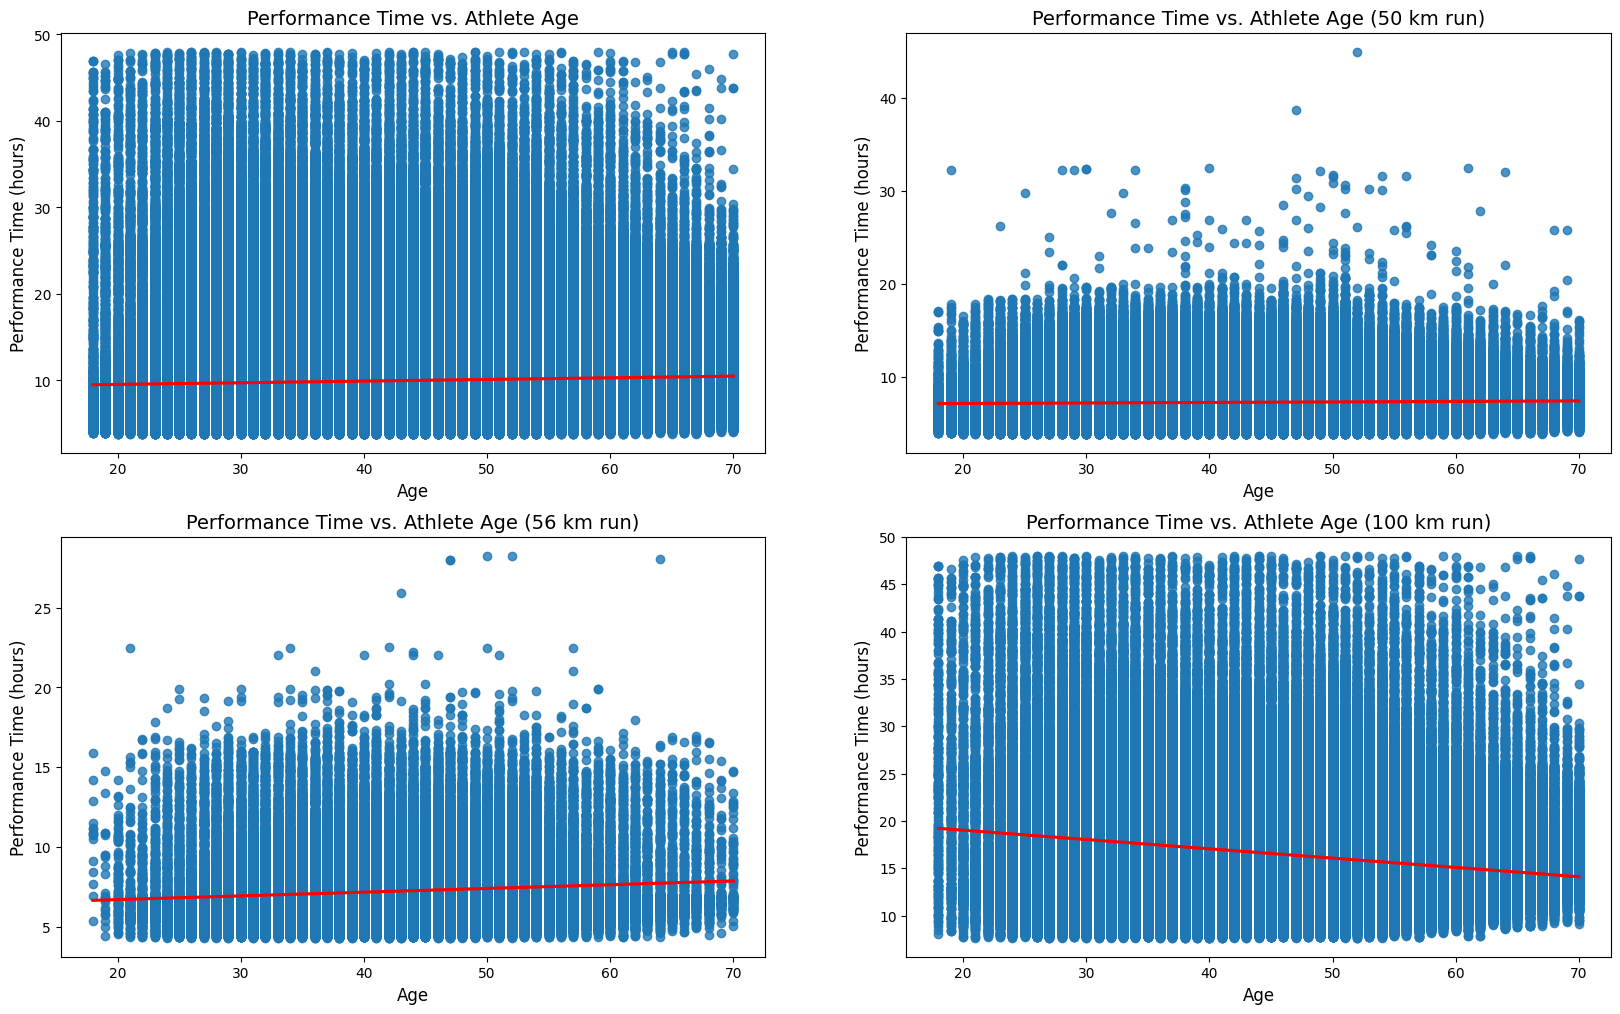

In [57]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.regplot(
    data=df,
    x='Athlete age', 
    y='Athlete run time (h)', 
    ci=None,
    line_kws={'color':'red'},

    )

plt.title('Performance Time vs. Athlete Age')
plt.xlabel('Age')
plt.ylabel('Performance Time (hours)')

plt.subplot(2,2,2)
sns.regplot(
    data=df[df['Event distance (km)']==50],
    x='Athlete age', 
    y='Athlete run time (h)', 
    ci=None,
    line_kws={'color':'red'},

    )

plt.title('Performance Time vs. Athlete Age (50 km run)')
plt.xlabel('Age')
plt.ylabel('Performance Time (hours)')


plt.subplot(2,2,3)
sns.regplot(
    data=df[df['Event distance (km)']==56],
    x='Athlete age', 
    y='Athlete run time (h)', 
    ci=None,
    line_kws={'color':'red'},

    )

plt.title('Performance Time vs. Athlete Age (56 km run)')
plt.xlabel('Age')
plt.ylabel('Performance Time (hours)')


plt.subplot(2,2,4)
sns.regplot(
    data=df[df['Event distance (km)']==100],
    x='Athlete age', 
    y='Athlete run time (h)', 
    ci=None,
    line_kws={'color':'red'},

    )

plt.title('Performance Time vs. Athlete Age (100 km run)')
plt.xlabel('Age')
plt.ylabel('Performance Time (hours)')

plt.show()

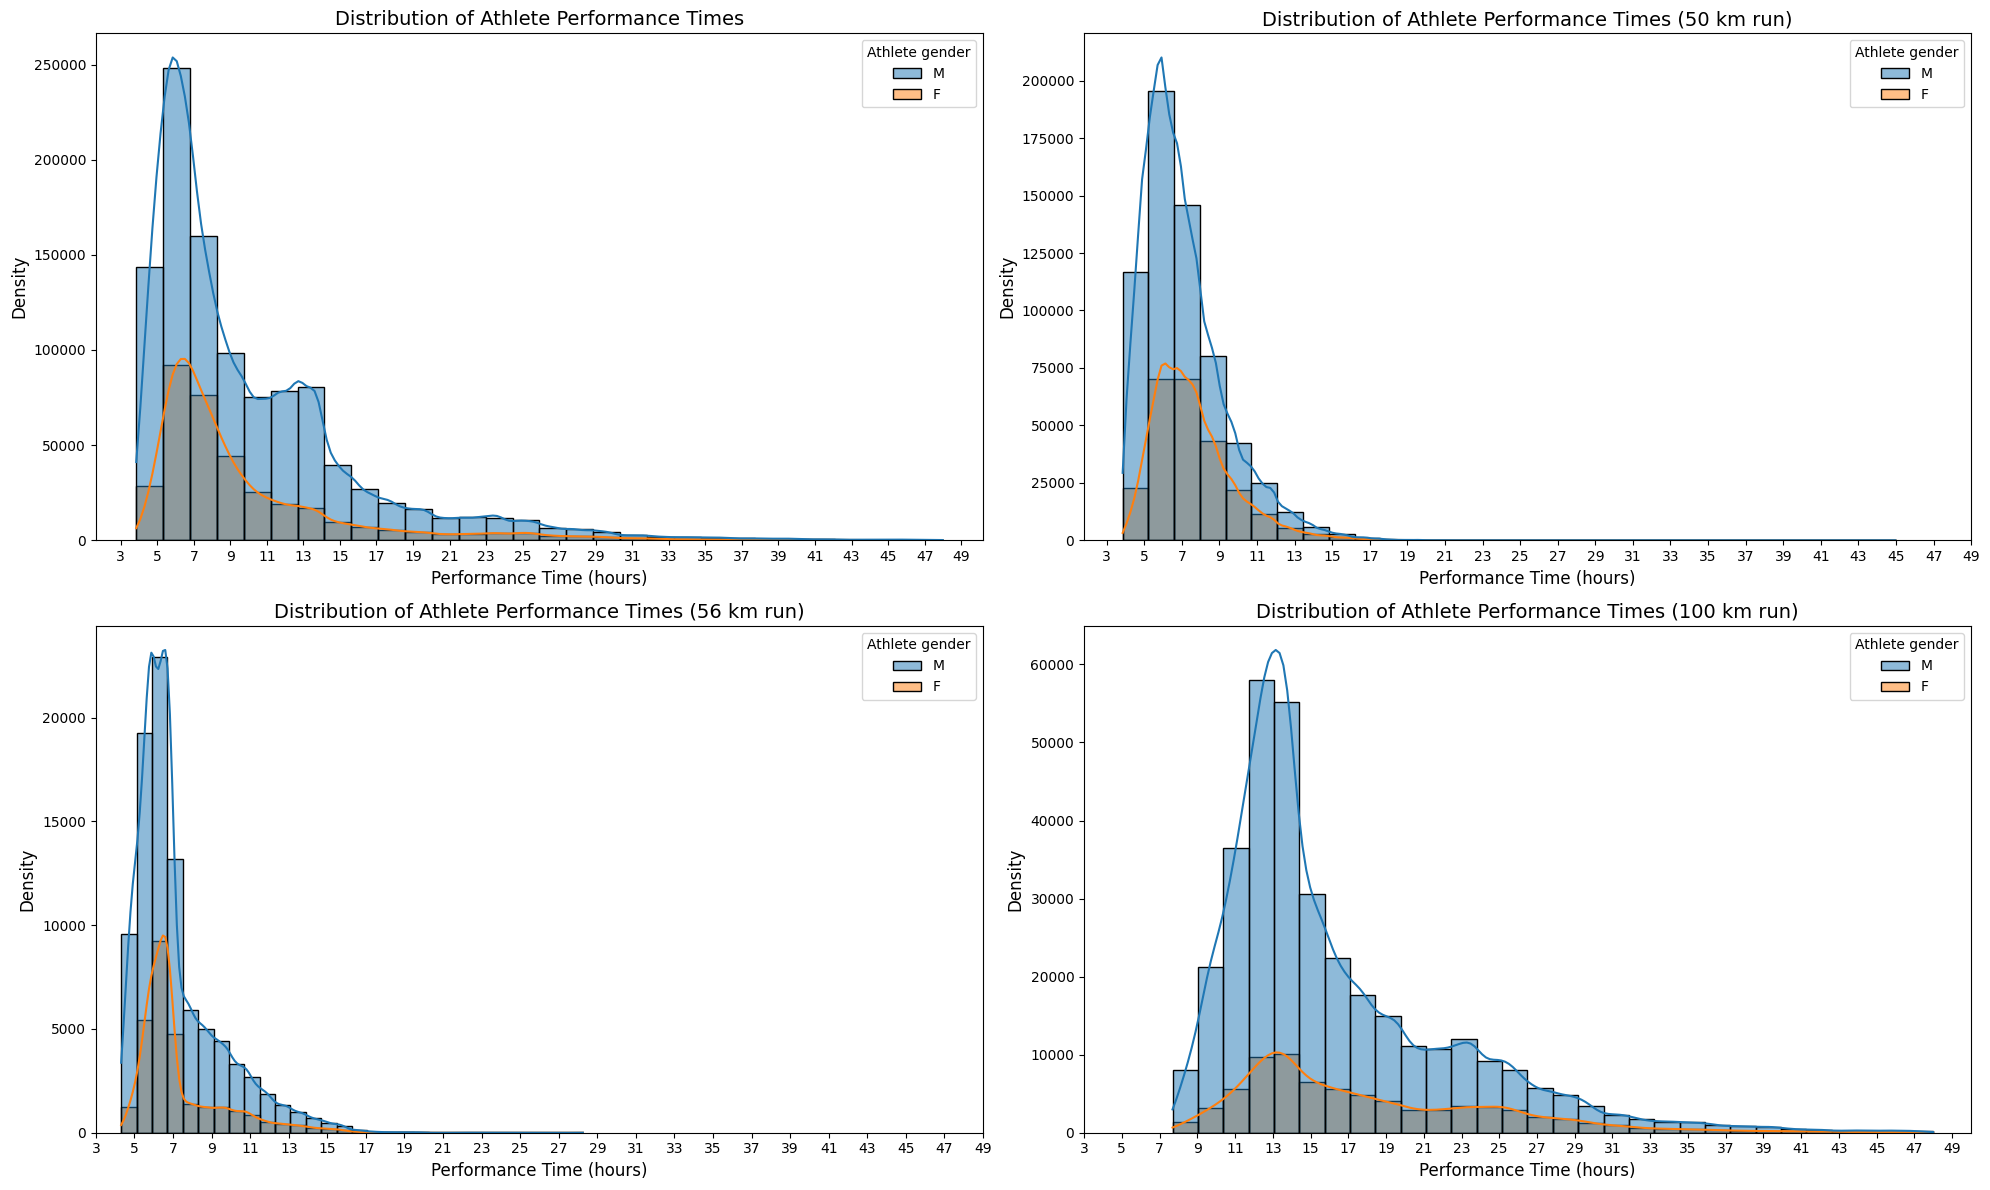

In [65]:
plt.figure(figsize=(20, 12))

# Create more frequent ticks
xticks = np.arange(3, 50, 2)

plt.subplot(2,2,1)
sns.histplot(
    data=df,
    x='Athlete run time (h)', 
    bins=30,
    kde=True,
    hue='Athlete gender'
    )
plt.title('Distribution of Athlete Performance Times')
plt.xlabel('Performance Time (hours)')
plt.ylabel('Density')
plt.xticks(ticks=xticks, labels=xticks)

plt.subplot(2,2,2)
sns.histplot(
    data=df[df['Event distance (km)']==50],
    x='Athlete run time (h)', 
    bins=30,
    kde=True,
    hue='Athlete gender'
    )
plt.title('Distribution of Athlete Performance Times (50 km run)')
plt.xlabel('Performance Time (hours)')
plt.ylabel('Density')
plt.xticks(ticks=xticks, labels=xticks)


plt.subplot(2,2,3)
sns.histplot(
    data=df[df['Event distance (km)']==56],
    x='Athlete run time (h)', 
    bins=30,
    kde=True,
    hue='Athlete gender'
    )
plt.title('Distribution of Athlete Performance Times (56 km run)')
plt.xlabel('Performance Time (hours)')
plt.ylabel('Density')
plt.xticks(ticks=xticks, labels=xticks)


plt.subplot(2,2,4)
sns.histplot(
    data=df[df['Event distance (km)']==100],
    x='Athlete run time (h)', 
    bins=30,
    kde=True,
    hue='Athlete gender'
    )
plt.title('Distribution of Athlete Performance Times (100 km run)')
plt.xlabel('Performance Time (hours)')
plt.ylabel('Density')

plt.tight_layout()
plt.xticks(ticks=xticks, labels=xticks)

plt.show()